# Missing values

Some of the values will be missed in the data set because of various reasons such as human error, machine failures etc. 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.drop('Purchased', axis=1)
y = dataset['Purchased']

In [4]:
X.head(10)

Country   Age   Salary
0   France  44.0  72000.0
1    Spain  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
5   France  35.0  58000.0
6    Spain   NaN  52000.0
7   France  48.0  79000.0
8  Germany  50.0  83000.0
9   France  37.0  67000.0

In [3]:
dataset.shape

(10, 4)

In [9]:
y.head()

0     No
1    Yes
2     No
3     No
4    Yes
Name: Purchased, dtype: object

## Taking care of missing data
Drop the Observation

In statistics, this method is called the listwise deletion technique. In this solution, we drop the entire observation if it contains a missing value.
Only if we are sure that the missing data is not informative, we perform this. Otherwise, we should consider other solutions.

Impute the Missing

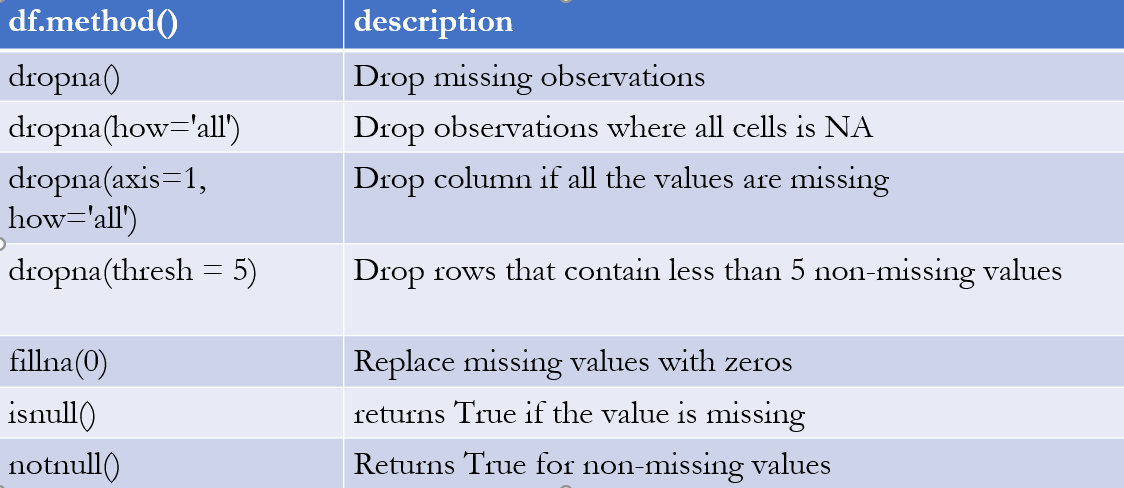

In [5]:
#columnwise nmber of null values
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [6]:
#total null values in the dataset
dataset.isnull().sum().sum()

2

In [7]:
#dropping the rows with missing values
df = dataset.dropna()
df


Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [13]:
#filling the missing values with 0
df= dataset.fillna(0)
df

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      0.0       Yes
5   France  35.0  58000.0       Yes
6    Spain   0.0  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [4]:
#impute the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

InvalidIndexError: (slice(None, None, None), slice(1, 3, None))

In [15]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


#Encoding
In machine Learning algorithms, based on the problem definition the data set might contain text or categorical values that are not numerical features. 

For example, marital status feature can have values like married, single and divorced, Gender feature will have Male or Female

Most Machine Learning algorithms prefer to work with numerical data so before applying the algorithms on the dataset, these non numerical columns needs to be treated. 

We have predominantly two methods for the same

One Hot Encoding

Label Encoding

Label Encoder and One Hot Encoder. These two encoders are parts of the SciKit Learn library in Python, and they are used to convert categorical data, or text data, into numbers, which our predictive models can better understand

##Thumb rule to follow: 

*   If the target column is categoric, we use the sklearn. LabelEncoder
*   If the feature column is categoric, we use the sklearn.OneHotEncoder

​


### Encoding the Independent Variable

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
country = dataset[['Country']]

In [30]:
ohe = OneHotEncoder()
country_enc = pd.DataFrame(ohe.fit_transform(country).toarray(), columns=sorted(dataset.Country.unique()), dtype=int)

In [36]:
country_enc.head()

France  Germany  Spain
0       1        0      0
1       0        0      1
2       0        1      0
3       0        0      1
4       0        1      0

In [34]:
dataset_ohe = pd.concat((dataset, country_enc), axis=1)

In [37]:
dataset_ohe.head()

Country   Age   Salary Purchased  France  Germany  Spain
0   France  44.0  72000.0        No       1        0      0
1    Spain  27.0  48000.0       Yes       0        0      1
2  Germany  30.0  54000.0        No       0        1      0
3    Spain  38.0  61000.0        No       0        0      1
4  Germany  40.0      NaN       Yes       0        1      0

### Dummy Variable

In [38]:
dataset_dummy_variables = pd.get_dummies(dataset, columns=['Country'])

In [39]:
dataset_dummy_variables.head()

Age   Salary Purchased  Country_France  Country_Germany  Country_Spain
0  44.0  72000.0        No               1                0              0
1  27.0  48000.0       Yes               0                0              1
2  30.0  54000.0        No               0                1              0
3  38.0  61000.0        No               0                0              1
4  40.0      NaN       Yes               0                1              0

### Encoding the Dependent Variable

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [41]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [8]:
test = pd.Series(range(6))

In [9]:
test

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [10]:
test.loc[2:4]= np.nan
test

0    0.0
1    1.0
2    NaN
3    NaN
4    NaN
5    5.0
dtype: float64

In [11]:
test.fillna(method='ffill')

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
5    5.0
dtype: float64

In [12]:
test.fillna(method='bfill')

0    0.0
1    1.0
2    5.0
3    5.0
4    5.0
5    5.0
dtype: float64

In [13]:
test.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

In [14]:
X = pd.DataFrame({'Shape': ['square','square','oval','circle',np.nan]})

In [15]:
X

Shape
0  square
1  square
2    oval
3  circle
4     NaN

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',fill_value='Missing')
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['Missing']], dtype=object)